## Face detection, comparison and clustering using FaceNet

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import imageio
from pathlib import Path

import embeddings
import clustering
import plotting

In [2]:
# Load example data
DATA_PATH = Path('/media/neuroscout-data/neuroscout/file_data/stimuli/')
images_by_class = {
    'forrest': ['fadd4b7515219897d3248c67fe82118ee79b18d4', '9ea4ba2aa79a7eb83cdc3c2bb0e2d92fe63ae1db', '93662962a5d014c78e4b772c78b82b273fadbb97', 'c649ed21e24954ed3395598797d7a4c42fdf9ee4', '0a7051e28588aec79ec56a7be47bcf31b3f6e5ad', 'f8f83976235caafae7a2846607de07c93fbc2e7b', 'f8a31d5952dc89acb1740715a663a511b8bdf118',  '323bb888180cd8cc624af8fc1b3680d4a2616578', '4422b0d33ad012d9cb33fb5d7a8be39dd9aa2295', '524be49e9ab7cefcd2695011e6eaf26ca803b92a', '70f5c1e087c3a4438112b054ff43ad24f511750a', '76d1aed69464b0916d242943cf55b4db6561ac0c', '76fc2f36d0701bbd819634de6f7d73fc71f651d1', '82d0f856784d4a488ba70af5930d50189e0f4ae9', '95e7e97d946d4af7bf2b3955c6a110c55a07cb4e', ],
    'lieutenant': ['68d586979eb99621279b76966d71eb38323ab79b', '8de21fbaf32f6a83f551e8177d555513f7d390d6', '2bdf960208ea4d52f84b514879d2665e5aca1508',  '485422775a638d8b308e50df5d6727750e40b3f9','291bcce76daa48da518772fb9dd9e9754c95f9ce', '815f0990053aa958af8f66523ef329ffe928f8ec', '5a2c6f285c2a62c17019f3a15236e00e70132ef0'],
    'jenny': ['6c5786977c4763c66c9fdadd91041d515ae110db', '5d166da83d65be5fe8762b2d57ffb4e98ab0e3c3', 'f16d751d63dcf9304369bc2d84ac921a2af41e6d', 'a2558374f4dc71799f056ca1b69d71661de6413e', 'a9fba67ce468922c01dafc49affeb59744f66321', '2edac4533874216d84fc853e55fb2191b57c5eca',  '54d3dfb37c611fe02bf0d6da0d8cdef5d33c2cd2', '1c3e6e80d882b34a78bc2ff4fba5edc6acbf3b68', '571d907e4fd9490e605567a0b5ded976e0e17472', 'fa6d83813869a05dd1008e5e8d0e6f1099349876', 'feeea02f4ec4fb5baa8d9386387ba6e5a40bfe81']
}

for l, paths in images_by_class.items():
    paths[:] = [str((DATA_PATH / p).with_suffix('.png')) for p in paths]

In [3]:
# Get embeddings for example data 
image_list = []
labels = []
# Flatten inputs
for label, paths in images_by_class.items():
    image_list += paths
    labels += [label] * len(paths)

test_embs, test_images, test_corr_paths = embeddings.get_embeddings(image_list)

W0723 15:37:01.251751 140531009460032 deprecation_wrapper.py:119] From /home/alejandro/repos/face_priming/embeddings.py:23: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0723 15:37:01.446693 140531009460032 deprecation_wrapper.py:119] From /home/alejandro/repos/face_priming/src/facenet/facenet/src/facenet.py:418: The name tf.train.import_meta_graph is deprecated. Please use tf.compat.v1.train.import_meta_graph instead.



Model directory: /home/alejandro/repos/face_priming/models/20180402-114759
Metagraph file: model-20180402-114759.meta
Checkpoint file: model-20180402-114759.ckpt-275


W0723 15:37:08.501995 140531009460032 deprecation.py:323] From /home/alejandro/anaconda3/envs/tf_gpu_10/lib/python3.7/site-packages/tensorflow/python/training/queue_runner_impl.py:391: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0723 15:37:08.536146 140531009460032 deprecation_wrapper.py:119] From /home/alejandro/repos/face_priming/src/facenet/facenet/src/facenet.py:419: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0723 15:37:08.536896 140531009460032 deprecation.py:323] From /home/alejandro/anaconda3/envs/tf_gpu_10/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to c

Creating networks and loading parameters


W0723 15:37:12.014990 140531009460032 deprecation_wrapper.py:119] From /home/alejandro/repos/face_priming/src/facenet/facenet/src/align/detect_face.py:197: The name tf.nn.xw_plus_b is deprecated. Please use tf.compat.v1.nn.xw_plus_b instead.



Loading, cropping, and aligning



Calculating embeddings...


In [212]:
len(labels)

33

Distance plot between primary face found in image


In [185]:
#  (can't re-run this as labels won't match up anymore, returns all faces
# images_distance = pd.DataFrame(distance.squareform(distance.pdist(test_embs)), columns=labels,  index=labels)`

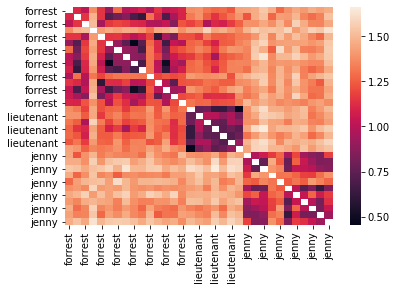

In [186]:
# sns.heatmap(images_distance[(images_distance != 0)])

### Try manually on hard example

In [4]:
nets = embeddings._load_detect_nets()

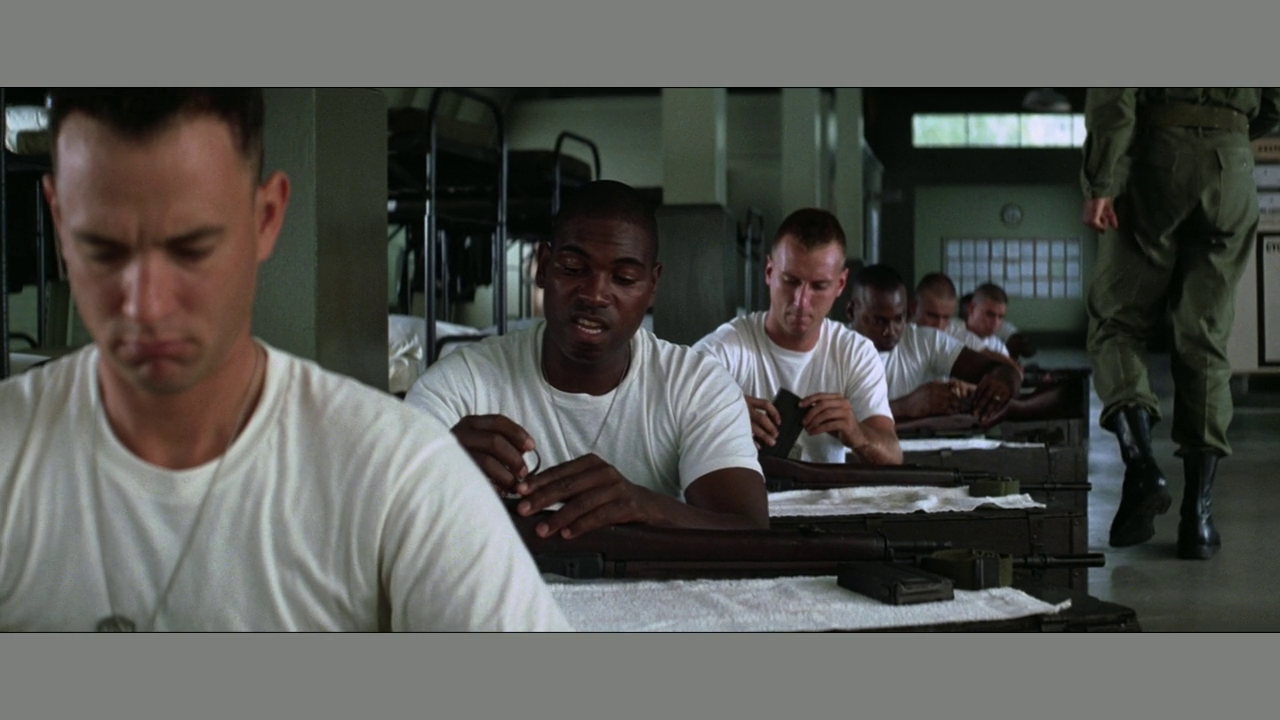

In [5]:
img_path = image_list[3]
Image(img_path)

In [6]:
img = imageio.imread(img_path)
bounding_boxes  = embeddings._detect_faces(img, nets)

In [7]:
len(bounding_boxes)

5

Five faces are found here. Only 3 were found by Google

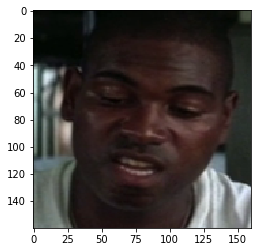

In [12]:
plt.imshow(plotting.standardize(embeddings.crop_face(img, bounding_boxes[0])))

### All faces found and corresponding images

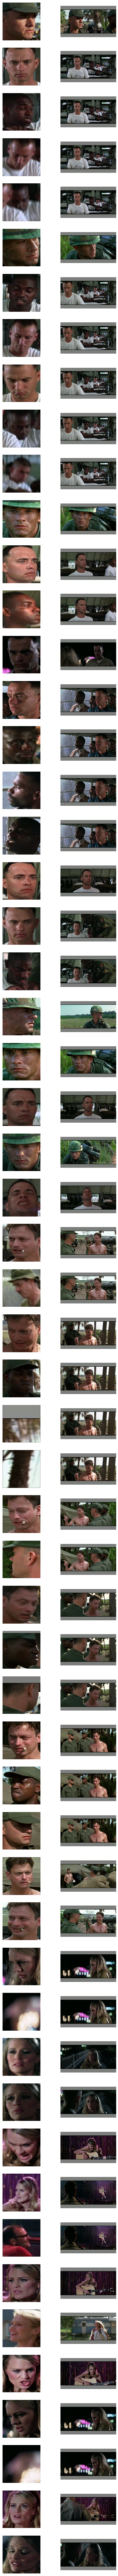

In [13]:
f, axarr = plt.subplots(len(test_images), 2, figsize=(6, 130))
[axi.set_axis_off() for axi in axarr.ravel()]
for ix, i in enumerate(test_images):
    axarr[ix, 0].imshow(plotting.standardize(i))
    axarr[ix, 1].imshow(imageio.imread(test_corr_paths[ix]))

### Cluster faces

In [33]:
clusters = clustering.chinese_whispers(test_corr_paths, test_images, test_embs, threshold=0.4)

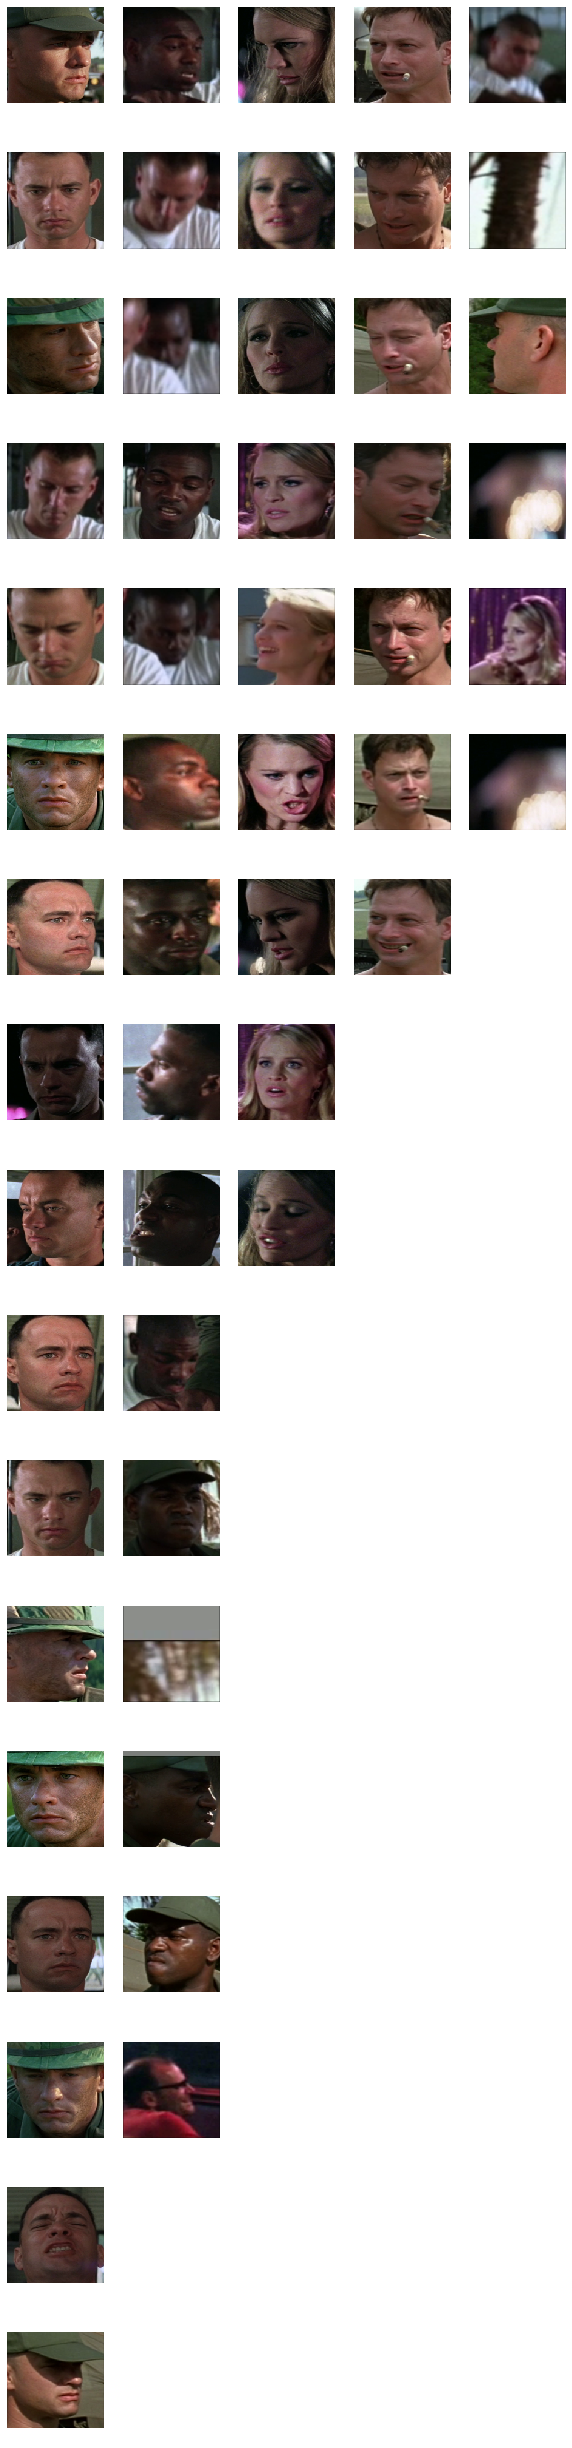

In [34]:
def plot_clusters(clusters, figsize=(10, 45)):
    cluster_shape = pd.DataFrame(clusters).shape
    f, axarr = plt.subplots(cluster_shape[1], cluster_shape[0], figsize=figsize)
    [axi.set_axis_off() for axi in axarr.ravel()]
    for ix, images in enumerate(clusters):
        for iy, i in enumerate(images):
            axarr[iy, ix].imshow(standardize(images[iy][1]))

## Embeddings and clustering on whole run

In [35]:
onsets = pd.read_csv('forrest_run3_whole_frames.csv')

In [36]:
subset = onsets[onsets.onset % 5 == 0.0].path

In [37]:
forrest_paths = [str(Path('/media/neuroscout-data/neuroscout/file_data/stimuli/') / Path(p).parts[-1]) for p in subset]

In [38]:
all_embs, cropped_images, corresponding_paths = embeddings.get_embeddings(forrest_paths)

Model directory: /home/alejandro/repos/face_priming/models/20180402-114759
Metagraph file: model-20180402-114759.meta
Checkpoint file: model-20180402-114759.ckpt-275
Creating networks and loading parameters
Loading, cropping, and aligning



Calculating embeddings...


#### No faces found in these images

Google didn't find faces in 74 of these images... Face Net in 47

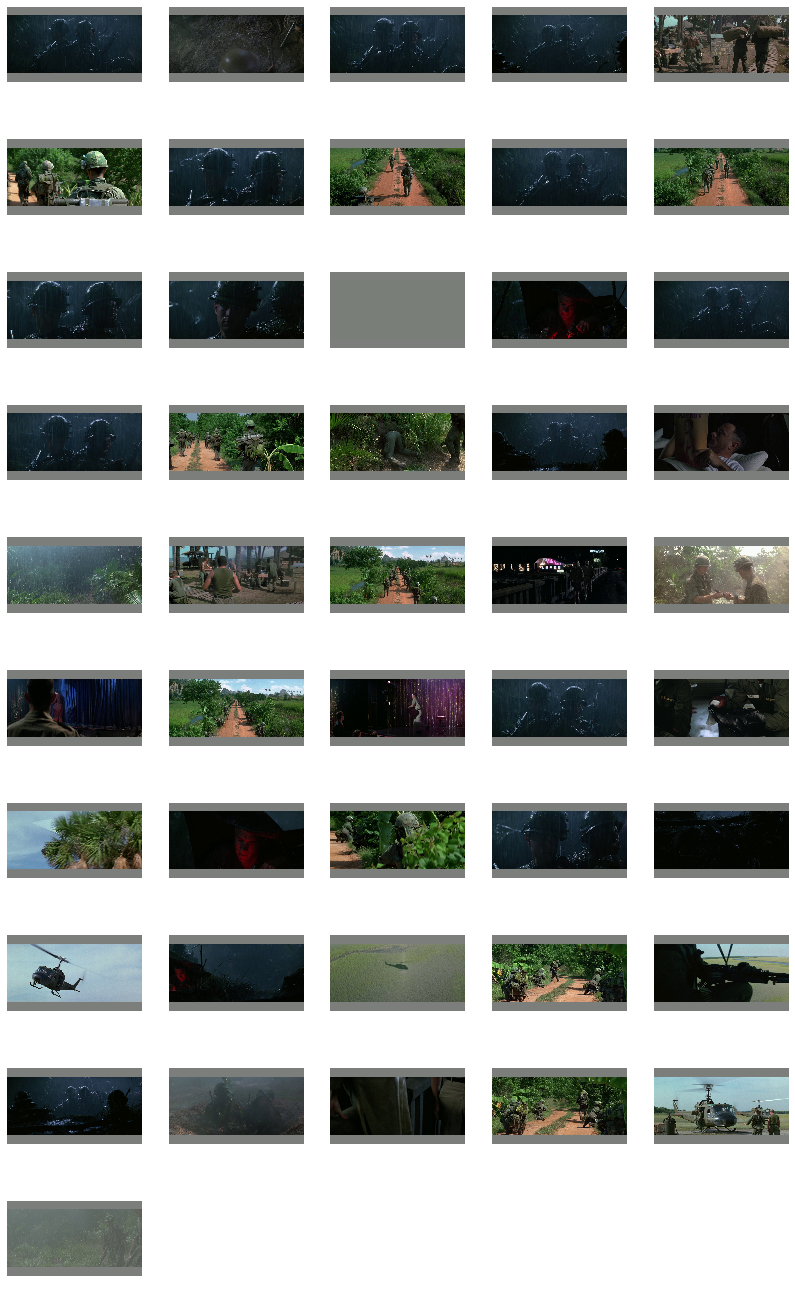

In [223]:
no_faces = list((set(forrest_paths) - set(corresponding_paths)))
cols = 5
rows = (len(no_faces) // cols) + 1
f, axarr = plt.subplots(rows, cols, figsize=(14, 24))
[axi.set_axis_off() for axi in axarr.ravel()]
for y in range(rows):
    for x in range(5):
        ix = (y * 5) + x
        if (ix + 1 < len(no_faces)):
            axarr[y, x].imshow(imageio.imread(no_faces[ix]))

#### Cluster faces across all images

In [224]:
clusters = chinese_whispers(corresponding_paths, cropped_images, all_embs, threshold=0.37)

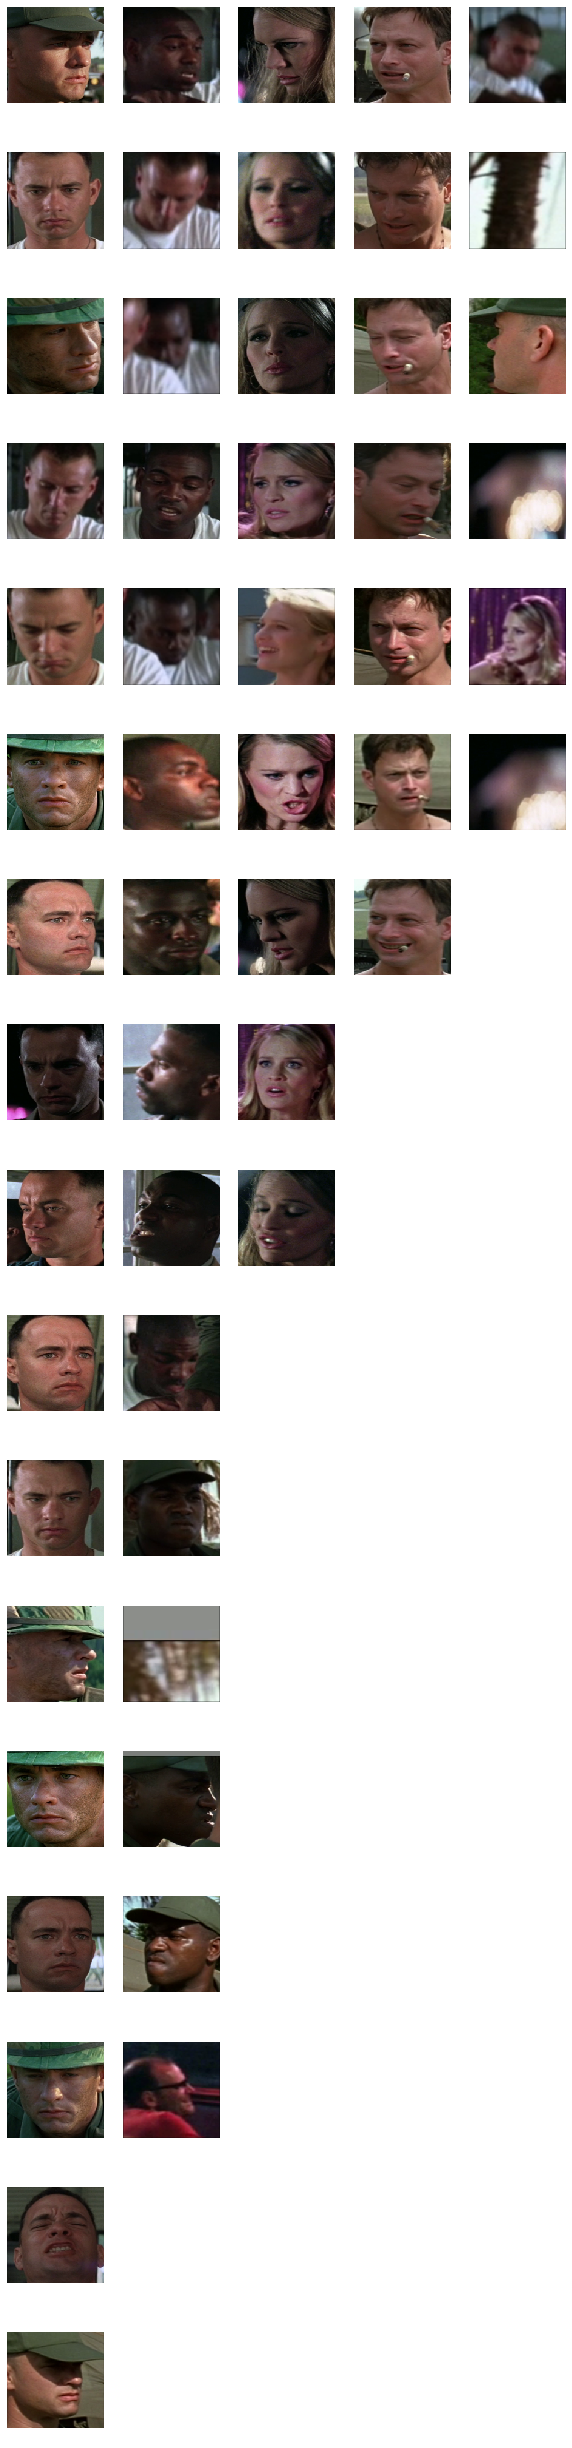

In [43]:
plotting.plot_clusters(clusters)

## fMRI models to try

- Face detection using this algorithm
- Regressor for every cluster (character)
- Binary new/old (for first second on screen of a given char)
- Total previous onscreen time (log transformed)
- Time since last onset (log transformed)
- Continuous measure of similarity (+ some time transformation?)